In [1]:
import os
import time
import numpy as np
import random
import sys
import netCDF4 as ncdf

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter , LatitudeFormatter

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# DJF_tref = np.load("./mean_tref_npys/DJF_tref.npy")
# JJA_tref = np.load("./mean_tref_npys/JJA_tref.npy")
# ANN_tref = np.load("./mean_tref_npys/ANN_tref.npy")
DJF_tref = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/tref/DJF_tref.npy")
JJA_tref = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/tref/JJA_tref.npy")
ANN_tref = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/tref/ANN_tref.npy")

print(DJF_tref.shape)
print(JJA_tref.shape)
print(ANN_tref.shape)

(6, 96, 144)
(6, 96, 144)
(6, 96, 144)


In [7]:
def plot_single_tref_diff(fig, gs, subfig_index, tref, color_interval, title_font, expname, mean, rmse):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree(central_longitude = 0)

    axs = fig.add_subplot(gs[i, j], projection = ccrs.Robinson(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    axs.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, j, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = axs.contourf(jlon, jlat, tref, color_interval, cmap =plt.cm.coolwarm, extend="both", transform = prj)
    # cs0 = axs.contourf(jlon, jlat, tref, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    axs.tick_params(labelsize = 7)

    title_left = "{}) {} rmse = {:.3f}".format(chr(subfig_index + 96), expname, rmse)
    #title_right = "mean = {:.3f} rmse = {:.3f}".format(mean, rmse)
    title_right = ""
    axs.set_title(title_left,  title_font, loc = "left")
    axs.set_title(title_right, title_font, loc = "right")
    
    return {'fig': fig, 'axs': axs, "cs0": cs0} #, 'cax': cax}

In [8]:
def plot_single_tref(fig, gs, subfig_index, tref, color_interval, title_font, expname, mean, rmse):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree(central_longitude = 0)

    axs = fig.add_subplot(gs[i, j], projection = ccrs.Robinson(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    axs.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, j, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = axs.contourf(jlon, jlat, tref, color_interval, cmap =plt.cm.rainbow, extend="both", transform = prj)
    # cs0 = axs.contourf(jlon, jlat, tref, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    axs.tick_params(labelsize = 7)

    title_left = "{}) {} rmse = {:.3f}".format(chr(subfig_index + 96), expname, rmse)
    #title_right = "mean = {:.3f} rmse = {:.3f}".format(mean, rmse)
    title_right = ""
    axs.set_title(title_left,  title_font, loc = "left")
    axs.set_title(title_right, title_font, loc = "right")
    
    return {'fig': fig, 'axs': axs, "cs0": cs0} #, 'cax': cax}

In [9]:
def subtitle_val(diag_cp, target_cp):
    
    mean = np.mean(diag_cp)
    rmse = np.sqrt(mean_squared_error(diag_cp, target_cp))
       
    return mean, rmse

In [23]:
expname = ["SPCAM", "Wang2022", "Wang2023(PhysC)", "CAM5", "Ours(Seed1117)", "Ours(Seed1)"]#, "new50_rh1d"]

In [16]:
all_tref = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/tref/all_tref.npy")

In [17]:
all_tref.shape

(6, 72, 96, 144)

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
['SPCAM', 'Wang2022', 'Wang2023(PhysC)', 'CAM5', 'Ours(Seed1117)', 'Ours(Seed1)']


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_28626/1487469291.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


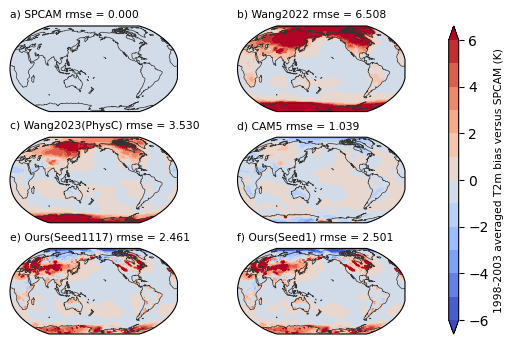

In [31]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.2, hspace=0.3)
# color_interval = list(np.arange(210,320,10).astype(int)) # 降水的非等距 color bar
color_interval = list(np.arange(-6,7,1).astype(int)) # 降水的非等距 color bar
print(color_interval)
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
print(expname)
for i in range(3):
    for j in range(2):
        mean, rmse = subtitle_val(all_tref[i*2+j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref_diff(fig, gs, i*2+j+1, all_tref[i*2+j].mean(axis=0)-all_tref[0].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
cbar = fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
cbar.set_label("1998-2003 averaged T2m bias versus SPCAM (K)", fontdict=font)


plt.tight_layout()
plt.savefig('ann-multi_precipitation_plot.pdf')

In [63]:
new_tref = np.load("./new_mean_npys/all_tref.npy")
new_djf = np.load("./new_mean_npys/DJF_tref.npy")
new_jja = np.load("./new_mean_npys/JJA_tref.npy")

In [64]:
print(new_tref.shape)

(4, 12, 96, 144)


row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/4251876185.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


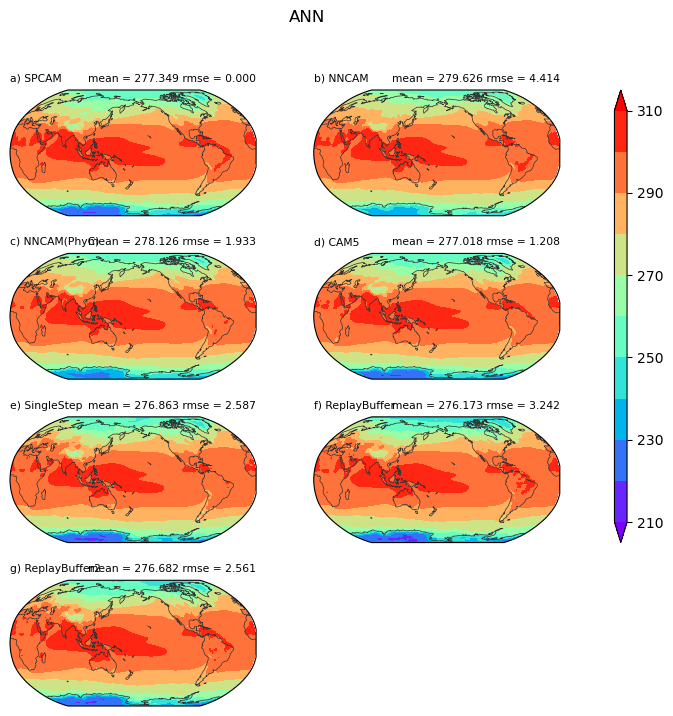

In [67]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(210,320,10).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2", "ReplayBuffer3"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(all_tref[i*2+j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref(fig, gs, i*2+j+1, all_tref[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_tref[j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref(fig, gs, i*2+j+1, new_tref[j].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(1):
        ji = 2+j
        mean, rmse = subtitle_val(new_tref[ji].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref(fig, gs, i*2+j+1, new_tref[ji].mean(axis=0), color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/137473136.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


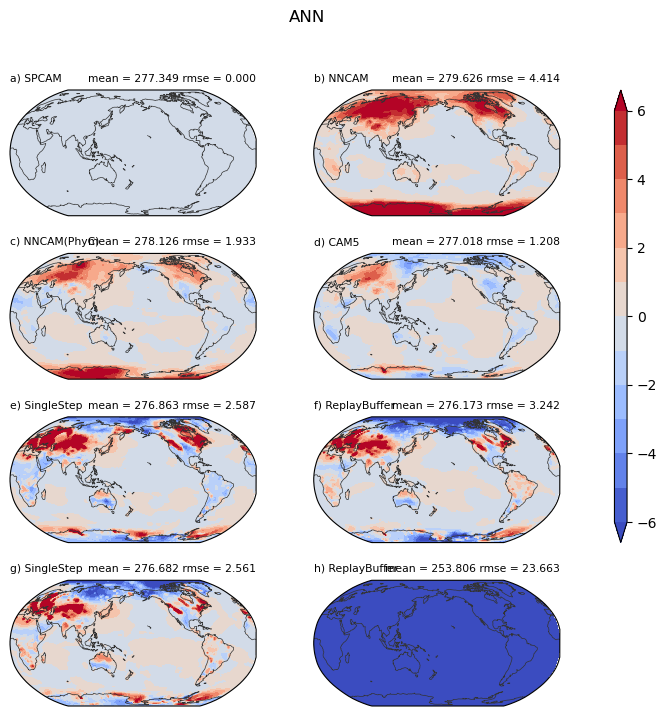

In [66]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(-6,7,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
# new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(all_tref[i*2+j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref_diff(fig, gs, i*2+j+1, all_tref[i*2+j].mean(axis=0)-all_tref[0].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_tref[j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref_diff(fig, gs, i*2+j+1, new_tref[j].mean(axis=0)-all_tref[0].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_tref[ji].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref_diff(fig, gs, i*2+j+1, new_tref[ji].mean(axis=0)-all_tref[0].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])


cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/475730621.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


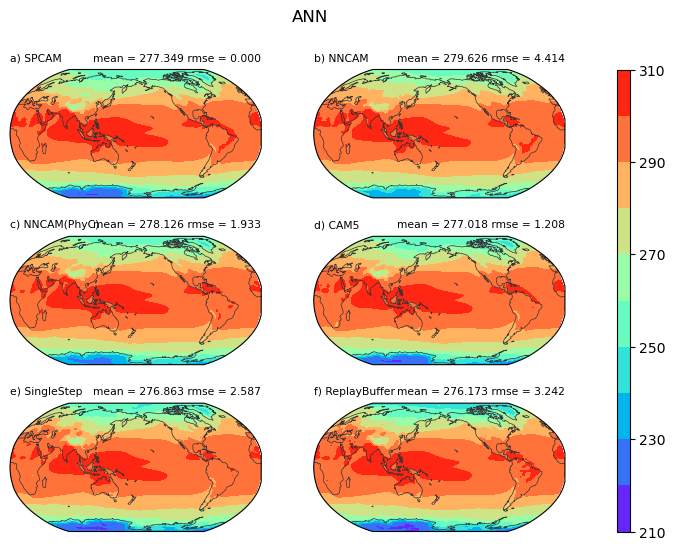

In [ ]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(210,320,10).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2", "ReplayBuffer3"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(all_tref[i*2+j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref(fig, gs, i*2+j+1, all_tref[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_tref[j].mean(axis=0), all_tref[0].mean(axis=0))
        plot = plot_single_tref(fig, gs, i*2+j+1, new_tref[j].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN (minus SPCAM)")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/4017859405.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


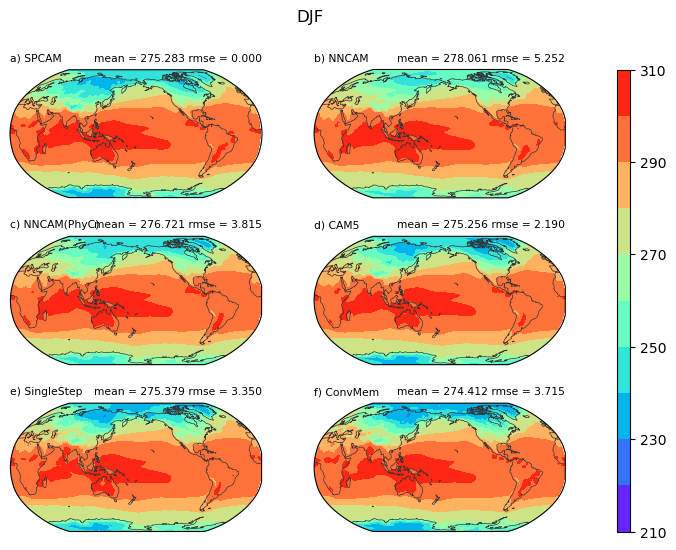

In [46]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(210,320,10).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ConvMem"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(DJF_tref[i*2+j], DJF_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, DJF_tref[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_djf[j], DJF_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, new_djf[j], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("DJF")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/3521344557.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


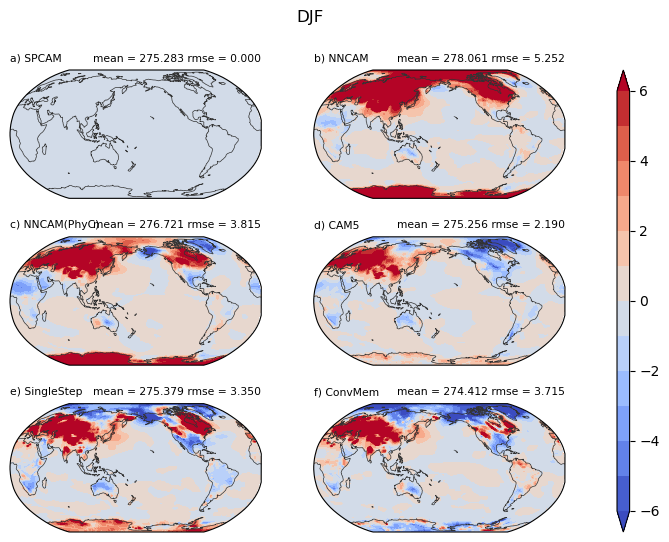

In [52]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(-6,7,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ConvMem"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(DJF_tref[i*2+j], DJF_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, DJF_tref[i*2+j]-DJF_tref[0], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_djf[j], DJF_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, new_djf[j]-DJF_tref[0], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("DJF")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/1210294984.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


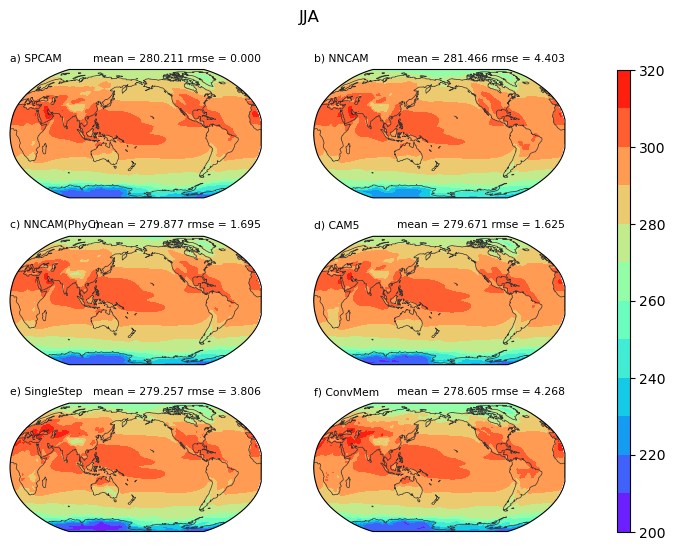

In [37]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
# color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
color_interval = list(np.arange(200,330,10).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ConvMem"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(JJA_tref[i*2+j], JJA_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, JJA_tref[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_jja[j], JJA_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, new_jja[j], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_27346/151308976.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


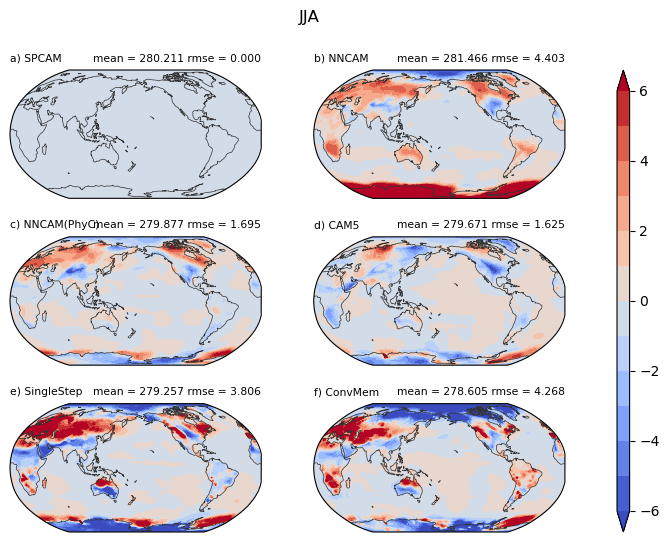

In [53]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
# color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
color_interval = list(np.arange(-6,7,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ConvMem"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(JJA_tref[i*2+j], JJA_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, JJA_tref[i*2+j]-JJA_tref[0], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_jja[j], JJA_tref[0])
        plot = plot_single_tref(fig, gs, i*2+j+1, new_jja[j]-JJA_tref[0], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/970985608.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


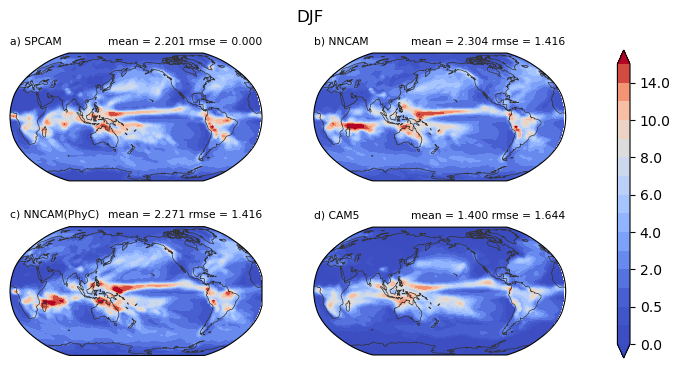

In [15]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(DJF_precip[i*2+j], DJF_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, DJF_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
fig.suptitle("DJF")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/3962968403.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


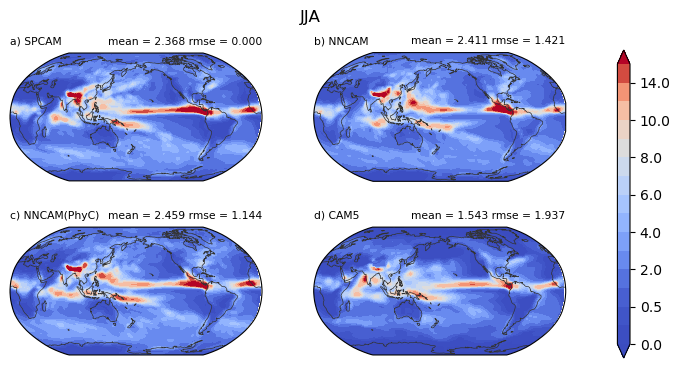

In [14]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(JJA_precip[i*2+j], JJA_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, JJA_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

In [26]:
temp_cp = precip[0].mean(axis=0)

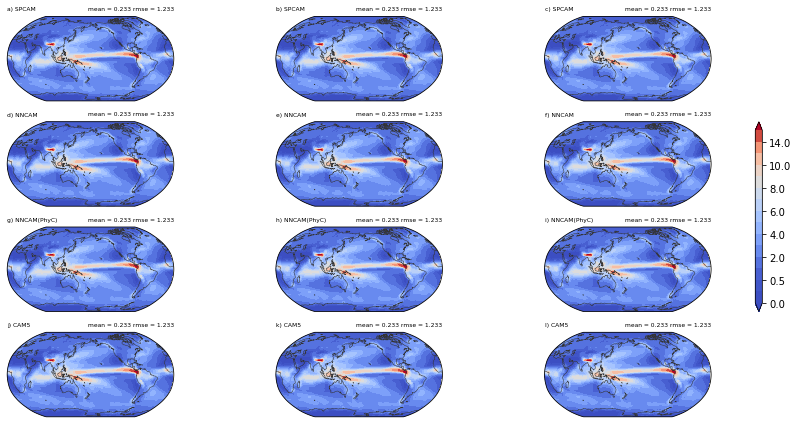

In [30]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.025], figure=fig)
# gs.update(wspace=0.05)#, hspace=0.25)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':6}
# font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(4):
    for j in range(3):
        plot = plot_single_precip(fig, gs, i*3+j+1, temp_cp, color_interval, font, expname[i], 0.233, 1.233)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[1:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.savefig('3x4-multi_precipitation_plot.pdf')